# H.Ehtasham
# --------------------------2017-CS-704------------------------------
# -----------------------------------B------------------------------------

## Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

### Read File and Show Dataset and Show Information about Dataset

In [2]:
data=pd.read_csv("iris.csv")
df=data.copy()

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df_oneHot=pd.get_dummies(df,columns=[ 'Species'])
       #'Species' 
df_oneHot.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


## Delete ID and Species

In [8]:
X=df.drop(['Id','Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.shape

(150, 6)

## Data Visualization

In [10]:
col={'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}

In [11]:
df['col']=df['Species'].map(col)

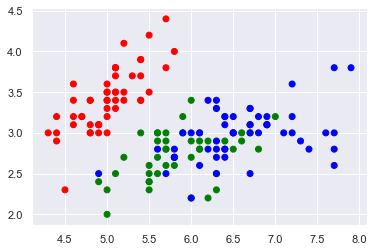

In [12]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['col'])
plt.show()

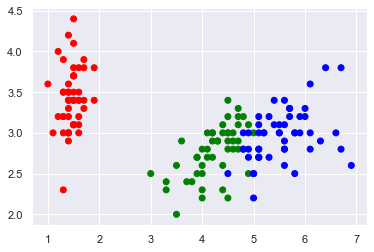

In [13]:
plt.scatter(df['PetalLengthCm'],df['SepalWidthCm'],c=df['col'])

plt.show()

## Training KMean At Data

In [14]:
kmean=KMeans(n_clusters=5,random_state=0).fit(X)

In [15]:
pred=X.copy()
pred['kmean1']=kmean.labels_
pred.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmean1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
pred['kmean1'].value_counts()

0    50
4    36
2    28
1    24
3    12
Name: kmean1, dtype: int64

In [17]:
kmean.inertia_

46.56163015873016

# Scaling

In [18]:
from sklearn.preprocessing import MaxAbsScaler

In [19]:
scaled=MaxAbsScaler()

In [20]:
new_scaled=scaled.fit_transform(X)

In [21]:
columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [22]:
scaled=pd.DataFrame(data=new_scaled,columns=columns)
scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08


In [23]:
kmean2=KMeans(n_clusters=5,random_state=0).fit(scaled)


In [24]:
pred=scaled.copy()
pred['kmean2']=kmean2.labels_
pred.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmean2
0,0.645570,0.795455,0.202899,0.08,0
1,0.620253,0.681818,0.202899,0.08,0
2,0.594937,0.727273,0.188406,0.08,0
3,0.582278,0.704545,0.217391,0.08,0
4,0.632911,0.818182,0.202899,0.08,0


In [25]:
kmean2.inertia_

1.867728001140137

In [26]:
pred['kmean2'].value_counts()

0    50
1    31
2    28
4    22
3    19
Name: kmean2, dtype: int64

## Elbow Method


In [27]:
cost=[]
for k in range(1,20):
    kmean_model=KMeans(n_clusters=k,random_state=0).fit(scaled)
    cost.append([k,kmean_model.inertia_])

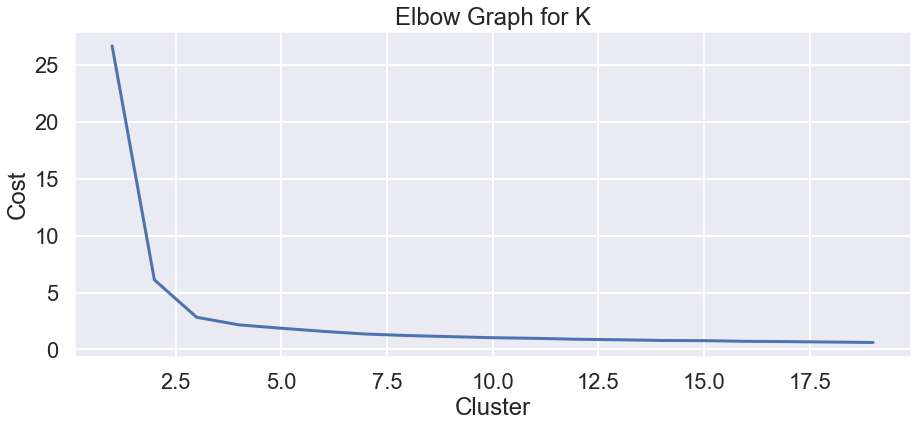

In [28]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost)[0],pd.DataFrame(cost)[1])
plt.xlabel("Cluster")
plt.ylabel("Cost")
plt.title("Elbow Graph for K")
plt.show()

- we can see that there are two fast changing curves and one slow changing curve
- So, There will be 3 clusters in this data

## Silhoutee Score

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
s_score=[]
for s in range(2,15):
    kmeanModel=KMeans(n_clusters=s,random_state=0).fit(scaled)
    s_score.append([s,silhouette_score(scaled,kmeanModel.labels_)])

In [31]:
s_score

[[2, 0.6833792830994077],
 [3, 0.5768790100393217],
 [4, 0.4981282385232134],
 [5, 0.46211613775158944],
 [6, 0.3368650892867478],
 [7, 0.3458540959835815],
 [8, 0.3281879312241552],
 [9, 0.31396878149490076],
 [10, 0.3259041438186652],
 [11, 0.31330646248478805],
 [12, 0.3273083529140284],
 [13, 0.3109457232445796],
 [14, 0.30038444198060343]]

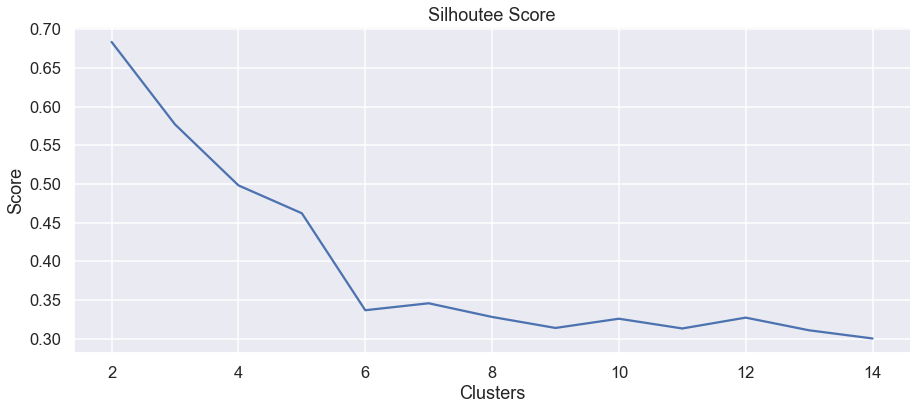

In [32]:
plt.figure(figsize=(15,6))
sns.set_context('talk')
plt.plot(pd.DataFrame(s_score)[0],pd.DataFrame(s_score)[1])
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Silhoutee Score')
plt.show()

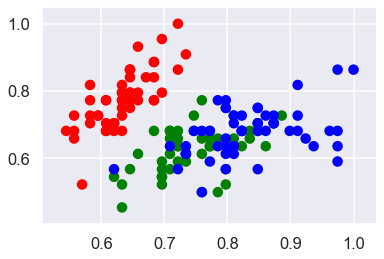

In [33]:
plt.scatter(scaled['SepalLengthCm'],scaled['SepalWidthCm'],c=df['col'])
plt.show()

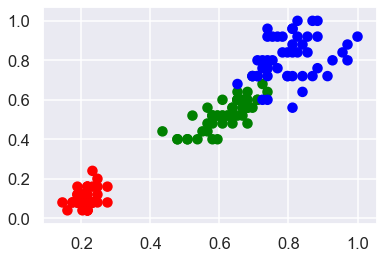

In [34]:
plt.scatter(scaled['PetalLengthCm'],scaled['PetalWidthCm'],c=df['col'])
plt.show()

In [35]:
kmean2=KMeans(n_clusters=3,random_state=0).fit(scaled)
pred=scaled.copy()
pred['kmean2']=kmean2.labels_
pred.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmean2
0,0.645570,0.795455,0.202899,0.08,0
1,0.620253,0.681818,0.202899,0.08,0
2,0.594937,0.727273,0.188406,0.08,0
3,0.582278,0.704545,0.217391,0.08,0
4,0.632911,0.818182,0.202899,0.08,0


In [36]:
pred['kmean2'].value_counts()

2    52
0    50
1    48
Name: kmean2, dtype: int64

In [37]:
kmean2.inertia_

2.8320876549209117

# Test

In [ ]:
print('In Cluster :',int(kmean2.predict([[0.632911,0.818182,0.202899,0.08]])))

In [ ]:
def test():
        a=int(input('enter sepalLength :'))
        b=int(input('enter sepalWidth :'))
        c=int(input('enter PetalLength :'))
        d=int(input('enter sepalWidth :'))
        print('Specie is in Cluster : ',int(kmean2.predict([[a,b,c,d]])))
        
test()

# CrossTab

In [ ]:
pd.crosstab(df['Species'],pred['kmean2'])